# Data Preprocessing: 
- ##  Clean and preprocess the raw data to handle noise, missing values, and time synchronization issues.

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime

In [17]:
## Loading the Dataset 
df = pd.read_csv('WR_tws.csv')
df.head()

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B
0,2025-02-10 07:42:30,Atul,129/130,Normal,"0.0,4.2,4.1,3.3,2.7,2.3,2.1,2.1,2,2,2,2.1,2.3,...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0,4.8,4.6,3.5,2.7,2.1,1.9,1.7,1.8,1.8,1.9,1.9,...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",TWS,TWS,100,100.0
1,2025-02-10 07:42:14,Atul,129/130,Reverse,"0,4.7,4.7,3.6,2.9,2.4,2.1,1.9,1.9,1.8,1.8,1.9,...","0.0,100.5,102.0,103.5,103.5,102.0,102.0,102.0,...","0.0,1.5,4.4,3.7,2.9,2.4,2,1.8,1.6,1.6,1.6,1.5,...","0.0,12.0,58.5,81.0,94.5,100.5,102.0,103.5,105....",TWS,TWS,100,100.0
2,2024-08-10 10:00:16,Atul,129/130,Reverse,"0,5,4.2,3.3,2.8,2.4,2.1,1.9,1.8,1.8,1.7,1.8,2,...","0.0,91.5,97.5,102.0,105.0,108.0,109.5,109.5,11...","0.0,4.1,3.9,3.1,2.5,2.1,1.8,1.6,1.6,1.5,1.6,1....","0.0,39.0,70.5,90.0,99.0,105.0,108.0,109.5,111....",TWS,TWS,100,100.0
3,2024-08-10 10:03:28,Atul,129/130,Normal,"0.0,1.6,4.4,3.6,2.9,2.4,2.1,1.9,1.8,1.7,1.7,1....","0.0,16.5,52.5,79.5,93.0,100.5,105.0,108.0,108....","0,5,4.1,3.1,2.4,2,1.8,1.6,1.5,1.5,1.4,1.6,1.9,...","0.0,93.0,99.0,105.0,108.0,111.0,112.5,112.5,11...",TWS,TWS,100,100.0
4,2024-08-10 10:28:37,Atul,129/130,Reverse,"0,4,4.9,3.9,3.1,2.6,2.2,2,1.9,1.8,1.8,1.8,1.9,...","0.0,97.5,93.0,99.0,103.5,106.5,108.0,109.5,111...","0.0,4.3,3.9,3,2.4,2,1.8,1.6,1.6,1.5,1.5,1.7,1....","0.0,43.5,73.5,91.5,100.5,106.5,109.5,109.5,111...",TWS,TWS,100,100.0


In [18]:
df.shape

(40773, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40773 entries, 0 to 40772
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                40773 non-null  object 
 1   Site Name           40773 non-null  object 
 2   Point Machine Name  40773 non-null  object 
 3   Direction           40773 non-null  object 
 4   A Current           40710 non-null  object 
 5   A Voltage           40706 non-null  object 
 6   B Current           40709 non-null  object 
 7   B Voltage           40686 non-null  object 
 8   Type of A           40773 non-null  object 
 9   Type of B           33258 non-null  object 
 10  Polling of A        40773 non-null  int64  
 11  Polling of B        33258 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 3.7+ MB


In [20]:
# First let's see what the raw data looks like
array_columns = ['A Current', 'A Voltage', 'B Current', 'B Voltage']

for col in array_columns:
    print(f"\nColumn: {col}")
    print("Sample values:")
    for val in df[col].head():
        print(f"Type: {type(val)}, Value: {val}")


Column: A Current
Sample values:
Type: <class 'str'>, Value: 0.0,4.2,4.1,3.3,2.7,2.3,2.1,2.1,2,2,2,2.1,2.3,2.5,2.6,2.7,2.8,2.9,2.8,2.7,2.3,2,1.9,1.8,1.7,1.7,1.6,0.0
Type: <class 'str'>, Value: 0,4.7,4.7,3.6,2.9,2.4,2.1,1.9,1.9,1.8,1.8,1.9,2.1,2.3,2.6,2.8,2.9,3,3.1,3.2,3.2,3.1,3,2.9,2.7,2.7,2.6,2.4,2.4,2.3,1.1,0.6,0.0
Type: <class 'str'>, Value: 0,5,4.2,3.3,2.8,2.4,2.1,1.9,1.8,1.8,1.7,1.8,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.1,3,2.7,2.4,2.4,2.4,2.3,2.3,2.2,1.6,0.8,0.4,0.0
Type: <class 'str'>, Value: 0.0,1.6,4.4,3.6,2.9,2.4,2.1,1.9,1.8,1.7,1.7,1.7,1.9,2.2,2.4,2.6,2.8,2.9,3,3.1,3.1,3,2.8,2.4,2.1,1.9,1.8,1.7,2.2,0.0
Type: <class 'str'>, Value: 0,4,4.9,3.9,3.1,2.6,2.2,2,1.9,1.8,1.8,1.8,1.9,2.1,2.4,2.6,2.9,3,3.1,3.2,3.3,3.3,3.1,2.8,2.5,2.4,2.4,2.4,2.3,2.3,1.6,0.8,0.4,0.0

Column: A Voltage
Sample values:
Type: <class 'str'>, Value: 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Type: <class 'str'>, Value: 0.0,100.5,102.0,103.5,103.5,102.

## Converting comma-separated strings to arrays 

In [21]:
array_columns = ['A Current', 'A Voltage', 'B Current', 'B Voltage']

def convert_to_array(x):
    if isinstance(x, str):
        try:
            # Split by comma and convert each to float
            # Handle cases where values might have trailing/leading spaces
            return np.array([float(val.strip()) for val in x.split(',') if val.strip()])
        except ValueError:
            # Fallback for any unexpected format
            return np.array([])
    else:
        return np.array([])

for col in array_columns:
    df[col] = df[col].apply(convert_to_array)

In [22]:
df.head()

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B
0,2025-02-10 07:42:30,Atul,129/130,Normal,"[0.0, 4.2, 4.1, 3.3, 2.7, 2.3, 2.1, 2.1, 2.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 4.8, 4.6, 3.5, 2.7, 2.1, 1.9, 1.7, 1.8, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",TWS,TWS,100,100.0
1,2025-02-10 07:42:14,Atul,129/130,Reverse,"[0.0, 4.7, 4.7, 3.6, 2.9, 2.4, 2.1, 1.9, 1.9, ...","[0.0, 100.5, 102.0, 103.5, 103.5, 102.0, 102.0...","[0.0, 1.5, 4.4, 3.7, 2.9, 2.4, 2.0, 1.8, 1.6, ...","[0.0, 12.0, 58.5, 81.0, 94.5, 100.5, 102.0, 10...",TWS,TWS,100,100.0
2,2024-08-10 10:00:16,Atul,129/130,Reverse,"[0.0, 5.0, 4.2, 3.3, 2.8, 2.4, 2.1, 1.9, 1.8, ...","[0.0, 91.5, 97.5, 102.0, 105.0, 108.0, 109.5, ...","[0.0, 4.1, 3.9, 3.1, 2.5, 2.1, 1.8, 1.6, 1.6, ...","[0.0, 39.0, 70.5, 90.0, 99.0, 105.0, 108.0, 10...",TWS,TWS,100,100.0
3,2024-08-10 10:03:28,Atul,129/130,Normal,"[0.0, 1.6, 4.4, 3.6, 2.9, 2.4, 2.1, 1.9, 1.8, ...","[0.0, 16.5, 52.5, 79.5, 93.0, 100.5, 105.0, 10...","[0.0, 5.0, 4.1, 3.1, 2.4, 2.0, 1.8, 1.6, 1.5, ...","[0.0, 93.0, 99.0, 105.0, 108.0, 111.0, 112.5, ...",TWS,TWS,100,100.0
4,2024-08-10 10:28:37,Atul,129/130,Reverse,"[0.0, 4.0, 4.9, 3.9, 3.1, 2.6, 2.2, 2.0, 1.9, ...","[0.0, 97.5, 93.0, 99.0, 103.5, 106.5, 108.0, 1...","[0.0, 4.3, 3.9, 3.0, 2.4, 2.0, 1.8, 1.6, 1.6, ...","[0.0, 43.5, 73.5, 91.5, 100.5, 106.5, 109.5, 1...",TWS,TWS,100,100.0


## Checking Null Values 

In [23]:
df.isnull().sum()

Time                     0
Site Name                0
Point Machine Name       0
Direction                0
A Current                0
A Voltage                0
B Current                0
B Voltage                0
Type of A                0
Type of B             7515
Polling of A             0
Polling of B          7515
dtype: int64

In [24]:
df['Time'] = pd.to_datetime(df['Time'])

## Clusters of missing Values at a certain time 

In [25]:
df['hour'] = df['Time'].dt.hour

def calculate_avg_length(group):
    lengths = []
    for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
        lengths.extend([len(x) for x in group[col] if isinstance(x, (list, np.ndarray))])
    return np.mean(lengths) if lengths else 0

time_missing_analysis = df.groupby('hour').apply(
    lambda g: pd.Series({
        'Total_Records': len(g),
        'Type_B_missing_pct': g['Type of B'].isna().mean() * 100,
        'Polling_B_missing_pct': g['Polling of B'].isna().mean() * 100,
        'Measurement_missing_pct': g[array_columns].isna().any(axis=1).mean() * 100,
        'Avg_Array_Length': calculate_avg_length(g)
    })
).reset_index()

print("Missing Data Patterns by Hour of Day:")
print(time_missing_analysis.to_markdown(index=False))

Missing Data Patterns by Hour of Day:
|   hour |   Total_Records |   Type_B_missing_pct |   Polling_B_missing_pct |   Measurement_missing_pct |   Avg_Array_Length |
|-------:|----------------:|---------------------:|------------------------:|--------------------------:|-------------------:|
|      0 |            1454 |              6.32737 |                 6.32737 |                         0 |            66.6023 |
|      1 |            1101 |             34.7866  |                34.7866  |                         0 |            92.2516 |
|      2 |            1440 |             31.4583  |                31.4583  |                         0 |            92.7106 |
|      3 |             850 |             29.0588  |                29.0588  |                         0 |            78.42   |
|      4 |            1335 |             31.236   |                31.236   |                         0 |            76.9875 |
|      5 |            1332 |             25.6006  |                25.600

## Site Specific Analysis 

In [26]:
site_missing_analysis = df.groupby(['Site Name', 'Point Machine Name']).apply(
    lambda g: pd.Series({
        'Total_Records': len(g),
        'Type_B_missing_pct': g['Type of B'].isna().mean() * 100,
        'Polling_B_missing_pct': g['Polling of B'].isna().mean() * 100,
        'Measurement_missing_pct': g[array_columns].isna().any(axis=1).mean() * 100,
        'Avg_Array_Length': calculate_avg_length(g),  # Reuse the same function
        'Direction_Normal_pct': (g['Direction'] == 'Normal').mean() * 100
    })
).reset_index()

print("Site-Specific Data Quality Analysis:")
print(site_missing_analysis.head(10).to_markdown())

Site-Specific Data Quality Analysis:
|    | Site Name   | Point Machine Name   |   Total_Records |   Type_B_missing_pct |   Polling_B_missing_pct |   Measurement_missing_pct |   Avg_Array_Length |   Direction_Normal_pct |
|---:|:------------|:---------------------|----------------:|---------------------:|------------------------:|--------------------------:|-------------------:|-----------------------:|
|  0 | Atul        | 129/130              |            1040 |                    0 |                       0 |                         0 |            37.4957 |                46.7308 |
|  1 | Atul        | 159/160              |             475 |                    0 |                       0 |                         0 |            51.5774 |                48.4211 |
|  2 | Bhestan     | PT-101/102           |            1405 |                    0 |                       0 |                         0 |            51.7874 |                51.7438 |
|  3 | Bhestan     | PT-109/110       

### Array lengths:
#### Bhestan PT-109/110 is an outlier with 197 measurements
##### Most sites in 35-65 range

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


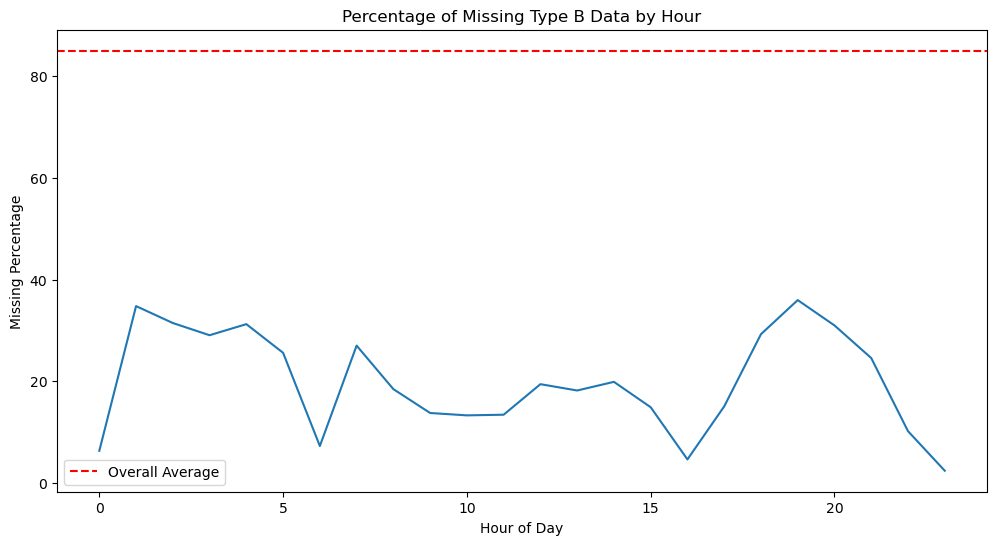

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_missing_analysis, x='hour', y='Type_B_missing_pct')
plt.title('Percentage of Missing Type B Data by Hour')
plt.ylabel('Missing Percentage')
plt.xlabel('Hour of Day')
plt.axhline(y=85, color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

In [30]:
# Filling Type of B with "TWS"
df['Type of B'] = df['Type of B'].fillna("TWS") 

 # Filling  Polling of B with 100.0
df['Polling of B'] = df['Polling of B'].fillna(100.0) 

In [31]:
df.isnull().sum()

Time                  0
Site Name             0
Point Machine Name    0
Direction             0
A Current             0
A Voltage             0
B Current             0
B Voltage             0
Type of A             0
Type of B             0
Polling of A          0
Polling of B          0
hour                  0
dtype: int64